In [0]:
!pip install --upgrade -q gspread

from google.colab import auth
auth.authenticate_user()

In [0]:
#IMPORT AUTH
from oauth2client.client import GoogleCredentials

import gspread
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.patches as mpatches

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
def editArr(x):
  a = np.array(x)
  for i in range(len(a)):
    a[i][0] = np.array(a[i][0].split(',')).astype(int)
  return a

def editArr2(x):
  a = np.array(x).astype(int)
  return a
  
#Digit_trn
worksheet_bintrn = gc.open('bindigit_trn').sheet1
rows_bintrn = worksheet_bintrn.get_all_values()
dataArr_bintrn = pd.DataFrame.from_records(rows_bintrn)
dataArr_bintrn = editArr(dataArr_bintrn)


#Digit_tst
worksheet_bintst = gc.open('bindigit_tst').sheet1
rows_bintst = worksheet_bintst.get_all_values()
dataArr_bintst = pd.DataFrame.from_records(rows_bintst)
dataArr_bintst = editArr(dataArr_bintst)


#Target_trn
worksheet_tartrn = gc.open('targetdigit_trn').sheet1
rows_tartrn = worksheet_tartrn.get_all_values()
dataArr_tartrn = pd.DataFrame.from_records(rows_tartrn)
dataArr_tartrn = editArr2(dataArr_tartrn)

  

#Target_tst
worksheet_tartst = gc.open('targetdigit_tst').sheet1
rows_tartst = worksheet_tartst.get_all_values()
dataArr_tartst = pd.DataFrame.from_records(rows_tartst)
dataArr_tartst = editArr2(dataArr_tartst)



from matplotlib import pyplot as plt

def vis(x):
  a = x.reshape(28,28)
  plt.axis('off')
  plt.imshow(a, interpolation='nearest')
  plt.title('Image')
  plt.show()


In [0]:
targets = np.zeros((10,len(dataArr_tartrn)))
for k in range(len(dataArr_tartrn)):
  targets[dataArr_tartrn[k],k] = 1
  
targets_tst = np.zeros((10,len(dataArr_tartst)))
for k in range(len(dataArr_tartst)):
  targets_tst[dataArr_tartst[k],k] = 1 

In [0]:
# STACKED RBM

calclayer
Tensor("Sigmoid:0", shape=(?, 100), dtype=float32)
(?, 100)
calclayer
Tensor("Sigmoid_1:0", shape=(?, 80), dtype=float32)
(?, 80)
calclayer
Tensor("Sigmoid_2:0", shape=(?, 60), dtype=float32)
(?, 60)
calclayer
Tensor("Sigmoid_3:0", shape=(?, 10), dtype=float32)
Train first layer
Start fine tuning
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4


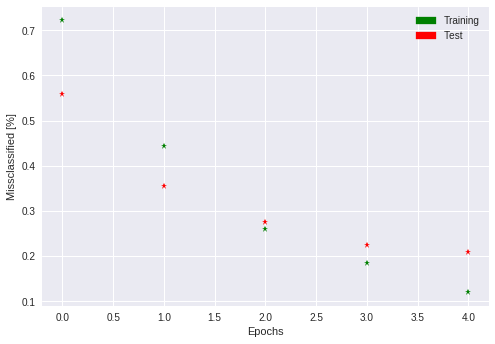

In [9]:
import numpy as np
import pandas as pd
import glob
import tensorflow as tf
from tensorflow.python.ops import control_flow_ops


## RBM
n_visible = 784
n_hidden_1  = 100
n_hidden_2  = 80
n_hidden_3  = 60

lr         = tf.constant(0.005, tf.float32) #The learning rate of our model

epochs = 5
epochsfinetune = 5
batch = 1000 #2000

no_unsupervised = True
useTwoLayers = False
useThreeLayers = False


x1  = tf.placeholder(tf.float32, [None, n_visible], name="x1") #The placeholder variable that holds our data
x2  = tf.placeholder(tf.float32, [None, n_hidden_1], name="x2") #The placeholder variable that holds our data
x3  = tf.placeholder(tf.float32, [None, n_hidden_2], name="x3") #The placeholder variable that holds our data

x  = tf.placeholder(tf.float32, [None, n_visible], name="x") #The placeholder variable that holds our data

y = tf.placeholder("float",[None,10])
yreal = tf.placeholder("float",[None,10])

#initialize the weight matrix with small (normally distributed) random values 
# 784, 100
W_vis_hid1  = tf.Variable(tf.random_normal([n_visible, n_hidden_1], 0.01), name="W_vis_hid1") #The weight matrix that stores the edge weights
# 100, 80
W_hid1_hid2  = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], 0.01), name="W_hid1_hid2") #The weight matrix that stores the edge weights
# 80, 60
W_hid2_hid3  = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], 0.01), name="W_hid2_hid3") #The weight matrix that stores the edge weights

# with hidden and visible biases initialized to 0
bv = tf.Variable(tf.zeros([1, n_visible],  tf.float32, name="bv")) #The bias vector for the visible layer
bh1 = tf.Variable(tf.zeros([1, n_hidden_1],  tf.float32, name="bh1")) #The bias vector for the hidden layer
bh2 = tf.Variable(tf.zeros([1, n_hidden_2],  tf.float32, name="bh2")) #The bias vector for the hidden layer
bh3 = tf.Variable(tf.zeros([1, n_hidden_3],  tf.float32, name="bh3")) #The bias vector for the hidden layer

if (useThreeLayers and not no_unsupervised): ## IF THREE LAYERS
  wOut = tf.Variable(tf.random_normal([n_hidden_3,10],0.01), tf.float32)
  bOut = tf.Variable(tf.zeros([1,10]), tf.float32)

elif (useTwoLayers and  not useThreeLayers and not no_unsupervised): ##IF TWO LAYERS
  wOut = tf.Variable(tf.random_normal([n_hidden_2,10],0.01), tf.float32)
  bOut = tf.Variable(tf.zeros([1,10]), tf.float32)
elif (not no_unsupervised):
  wOut = tf.Variable(tf.random_normal([n_hidden_1,10],0.01), tf.float32)
  bOut = tf.Variable(tf.zeros([1,10]), tf.float32)
  
if(no_unsupervised):
  wOut = tf.Variable(tf.random_normal([n_hidden_3,10],0.01), tf.float32)
  bOut = tf.Variable(tf.zeros([1,10]), tf.float32)
    
  
def calcLayers(x,w,b):
    #Hidden layer sigmoid
    calc = tf.nn.sigmoid(tf.add(tf.matmul(x,w), b))
    print("calclayer")
    print(calc)
    return calc

  



visToHid1 = calcLayers(x,W_vis_hid1,bh1)  
print(np.shape(visToHid1)) # (?, 100)

if( not useTwoLayers and  not useThreeLayers and not no_unsupervised):
  label = calcLayers(visToHid1,wOut,bOut)

hid1ToHid2 = calcLayers(visToHid1, W_hid1_hid2, bh2)
print(np.shape(hid1ToHid2)) # (?, 80)
if(useTwoLayers and  not useThreeLayers and not no_unsupervised): ##IF TWO LAYERS
  label = calcLayers(hid1ToHid2,wOut,bOut)

hid2ToHid3 = calcLayers(hid1ToHid2,W_hid2_hid3,bh3)  
print(np.shape(hid2ToHid3)) # (?, 60)
if(useThreeLayers and not no_unsupervised): ## IF THREE LAYERS
  label = calcLayers(hid2ToHid3,wOut, bOut) 
  print(np.shape(label)) # (?, 10)  

if (no_unsupervised and  not useThreeLayers and not useTwoLayers):
  label = calcLayers(hid2ToHid3,wOut, bOut)
  
y_pred_final = label
y_real = y

loss_all = tf.reduce_mean(tf.pow(y_real-y_pred_final,2))   
optimizer_all = tf.train.RMSPropOptimizer(lr).minimize(loss_all)  
  
def sample(probs):
    return tf.floor(probs + tf.random_uniform(tf.shape(probs), 0, 1))

# Lets agree on that when we finally submit this task of the lab to never speak about this code again , yeah! 
  
def gibbs_sample1(k):
    def gibbs_step1(count, k, xk):
        hk = sample(tf.sigmoid(tf.matmul(xk, W_vis_hid1) + bh1)) #Propagate the visible values to sample the hidden1 values
        xk = sample(tf.sigmoid(tf.matmul(hk, tf.transpose(W_vis_hid1)) + bv)) #Propagate the hidden1 values to sample the visible values
        return count+1, k, xk

    ct = tf.constant(0) #counter
    for i in range (k):
      [_,_,x_sample1] = gibbs_step1(ct,tf.constant(k),x1)
    x_sample1 = tf.stop_gradient(x_sample1) 
    return x_sample1  

def gibbs_sample2(k):
    def gibbs_step2(count, k, xk_1):
        #[?,784], [100,80].
        hk_1 = sample(tf.sigmoid(tf.matmul(xk_1, W_hid1_hid2) + bh2)) #Propagate the hidden1 values to sample the hidden2 values
        xk_1 = sample(tf.sigmoid(tf.matmul(hk_1, tf.transpose(W_hid1_hid2)) + bh1)) #Propagate the hidden2 values to sample the hidden1 values
        return count+1, k, xk_1

    ct = tf.constant(0) #counter
    for i in range (k):
      [_,_,x_sample2] = gibbs_step2(ct,tf.constant(k),x2)
    x_sample2 = tf.stop_gradient(x_sample2) 
    return x_sample2
  
def gibbs_sample3(k):
    def gibbs_step3(count, k, xk_2):
        hk_2 = sample(tf.sigmoid(tf.matmul(xk_2, W_hid2_hid3) + bh3)) #Propagate the hidden2 values to sample the hidden3 values
        xk_2 = sample(tf.sigmoid(tf.matmul(hk_2, tf.transpose(W_hid2_hid3)) + bh2)) #Propagate the hidden3 values to sample the hidden2 values
        return count+1, k, xk_2

    ct = tf.constant(0) #counter
    for i in range (k):
      [_,_,x_sample3] = gibbs_step3(ct,tf.constant(k),x3)
    x_sample3 = tf.stop_gradient(x_sample3) 
    return x_sample3
  
 
def gibbs_sample_all(k):
    #Runs a k-step gibbs chain to sample from the probability distribution of the RBM defined by W, bh, bv
    def gibbs_step_all(count, k, xk):
        #Runs a single gibbs step. The visible values are initialized to xk
        
        hk = sample(tf.sigmoid(tf.matmul(xk, W_vis_hid1) + bh1)) #Propagate the visible values to sample the hidden1 values
        hk_1 = sample(tf.sigmoid(tf.matmul(hk, W_hid1_hid2) + bh2)) #Propagate the hidden1 values to sample the hidden2 values
        hk_2 = sample(tf.sigmoid(tf.matmul(hk_1, W_hid2_hid3) + bh3)) #Propagate the hidden2 values to sample the hidden3 values
        xk_2 = sample(tf.sigmoid(tf.matmul(hk_2, tf.transpose(W_hid2_hid3)) + bh2)) #Propagate the hidden3 values to sample the hidden2 values
        xk_1 = sample(tf.sigmoid(tf.matmul(hk_1, tf.transpose(W_hid1_hid2)) + bh1)) #Propagate the hidden2 values to sample the hidden1 values
        xk = sample(tf.sigmoid(tf.matmul(hk, tf.transpose(W_vis_hid1)) + bv))       #Propagate the hidden1 values to sample the visible values
        
        return count+1, k, xk,xk_1, xk_2

    #Run gibbs steps for k iterations
    ct = tf.constant(0) #counter
    for i in range (k):
      [_,_,x_sample_all, h1_sample_all, h2_sample_all] = gibbs_step_all(ct,tf.constant(k),x)
    
    x_sample_all = tf.stop_gradient(x_sample_all) 

    return x_sample_all, h1_sample_all, h2_sample_all

### Trai1ning Update Code 1
x_sample1 = gibbs_sample1(1) 
h1 = sample(tf.sigmoid(tf.matmul(x1, W_vis_hid1) + bh1)) 
h_sample1 = sample(tf.sigmoid(tf.matmul(x_sample1, W_vis_hid1) + bh1)) 

### Trai1ning Update Code 2
x_sample2 = gibbs_sample2(1) 
h2 = sample(tf.sigmoid(tf.matmul(x2, W_hid1_hid2) + bh2)) 
h_sample2 = sample(tf.sigmoid(tf.matmul(x_sample2, W_hid1_hid2) + bh2)) 

### Trai1ning Update Code 3
x_sample3 = gibbs_sample3(1) 
h3 = sample(tf.sigmoid(tf.matmul(x3, W_hid2_hid3) + bh3)) 
h_sample3 = sample(tf.sigmoid(tf.matmul(x_sample3, W_hid2_hid3) + bh3)) 

### Trai1ning Update ALL
x_sample_all = gibbs_sample_all(1) 

x_sample_all_x = x_sample_all[0]
x_sample_all_h1 = x_sample_all[0]
x_sample_all_h2 = x_sample_all[0]

h_all = sample(tf.sigmoid(tf.matmul(x, W_vis_hid1) + bh1)) 
h_sample_all = sample(tf.sigmoid(tf.matmul(x_sample_all_x, W_vis_hid1) + bh1)) 


#Next, we update the values of W, bh, and bv, based on the difference between the samples that we drew and the original values
size_bt1 = tf.cast(tf.shape(x1)[0], tf.float32)
size_bt2 = tf.cast(tf.shape(x2)[0], tf.float32)
size_bt3 = tf.cast(tf.shape(x3)[0], tf.float32)


W1_adder  = tf.multiply(lr/size_bt1, tf.subtract(tf.matmul(tf.transpose(x1), h1), tf.matmul(tf.transpose(x_sample1), h_sample1)))
W2_adder  = tf.multiply(lr/size_bt2, tf.subtract(tf.matmul(tf.transpose(x2), h2), tf.matmul(tf.transpose(x_sample2), h_sample2)))
W3_adder  = tf.multiply(lr/size_bt3, tf.subtract(tf.matmul(tf.transpose(x3), h3), tf.matmul(tf.transpose(x_sample3), h_sample3)))


bv_adder = tf.multiply(lr/size_bt1, tf.reduce_sum(tf.subtract(x1, x_sample1), 0, True))
bh1_adder = tf.multiply(lr/size_bt1, tf.reduce_sum(tf.subtract(h1, h_sample1), 0, True))
bh2_adder = tf.multiply(lr/size_bt2, tf.reduce_sum(tf.subtract(h2, h_sample2), 0, True))
bh3_adder = tf.multiply(lr/size_bt3, tf.reduce_sum(tf.subtract(h3, h_sample3), 0, True))

updt_1 = [W_vis_hid1.assign_add(W1_adder), 
          bv.assign_add(bv_adder), 
          bh1.assign_add(bh1_adder)]


updt_2 = [W_hid1_hid2.assign_add(W2_adder), 
          bh1.assign_add(bh1_adder), 
          bh2.assign_add(bh2_adder)]

updt_3 = [W_hid2_hid3.assign_add(W3_adder), 
          bh2.assign_add(bh2_adder), 
          bh3.assign_add(bh3_adder)]


updt_all = [W_vis_hid1.assign_add(W1_adder), 
          bv.assign_add(bv_adder), 
          bh1.assign_add(bh1_adder)]

weights_h1 = np.zeros((batch, n_hidden_1))
weights_h2 = np.zeros((n_hidden_1, n_hidden_2))

error = np.zeros([epochs])
error2 = np.zeros([epochs])
error3 = np.zeros([epochs])


error = np.zeros(epochs)
error_local = np.zeros(batch)
test_error = np.zeros(epochs)
test_error_local = np.zeros(batch)


with tf.Session() as sess:
    #First, we train the model
    #initialize the variables of the model
    init = tf.global_variables_initializer()
    sess.run(init)
    # Train first layer
    print("Train first layer")
    if (not no_unsupervised):
      output_1 = np.zeros([batch,n_hidden_1]) # (N, 100)

      w2_org =  sess.run(W_hid1_hid2)
      w3_org = sess.run(W_hid2_hid3)

      for i in range(epochs):
          print("Epoch number " + str(i))
          localerror = np.zeros([batch])
          for j in range(batch):

              x_train = np.array(dataArr_bintrn[j,:][0])
              x_train = [x_train]
              # update returns W1_adder, bh1_adder and bh2_adder
              [update,label1,out1]=sess.run([updt_1,x_sample1,h_sample1], feed_dict={x1: x_train})
              #print(h_sample1)
              localerror[j] = np.sum(0.5*(x_train-label1)**2)/n_visible

              if i == epochs-1:
                output_1[j,:] = out1

          error[i] = np.sum(localerror)/batch
    ### HERE WE NEED TO OBTAIN SAMPLES TO INPUT TO THE SECOND LAYER
    
    # Train second layer
    if(useTwoLayers):
      print("Train second layer")
      output_2 = np.zeros([batch,n_hidden_2])
      
      for i in range(epochs):
          print("Epoch number " + str(i))
          localerror2=np.zeros([batch]) ## SAME NUMBER AS
          for j in range(batch):
              x_train = [np.array(dataArr_bintrn[j,:][0])]
              x_train2 = output_1[j,:]
              x_train2 = [x_train2]
              
              # For some reason, the second run needs both x1 and x2?
              [_,label2,out2]=sess.run([updt_2,x_sample2,h_sample2], feed_dict={x2: x_train2, x1: x_train}) #WHY DOES IT SAY THAT WE NEED TO FEED IN 784 VECTOR??
              localerror2[j] = np.sum(0.5*(x_train2-label2)**2)/n_hidden_1 # ? correct
              if i == epochs-1:
                output_2[j,:] = out2
          error2[i] = np.sum(localerror)/batch
          
          
          
    # Train third layer
    if(useThreeLayers):
      print("Train third layer")
      output_3 = np.zeros([batch,n_hidden_3])

      for i in range(epochs):
          print("Epoch number " + str(i))
          localerror3=np.zeros([batch]) ## SAME NUMBER AS
          for j in range(batch):
              
              x_train2 = [output_1[j,:]]
              x_train3 = output_2[j,:]
              x_train3 = [x_train3]
              
              # And here as well.. need to check the code again. Maybe we are using the old variables somewhere they arent supposed to be used
              [_,label3,out3]=sess.run([updt_3,x_sample3,h_sample3], feed_dict={x3: x_train3, x2: x_train2}) #WHY DOES IT SAY THAT WE NEED TO FEED IN 784 VECTOR??
              localerror3[j] = np.sum(0.5*(x_train3-label3)**2)/n_hidden_2 # ? correct ?!?
          error3[i] = np.sum(localerror)/batch
          
          if i == epochs-1:
            output_3[j,:] = out3
        
    # FINE TUNE
    #Run through all of the training data num_epochs times
    # Train all SUPERVISED LEARNING
    print("Start fine tuning")
    for i in range(epochsfinetune):
      print("epoch " + str(i))
      correctClasstrain = 0

      for j in range(batch):
        x_train = np.transpose(np.array(dataArr_bintrn[j,:][0]))
      
        x_train = [x_train]
        
        target = targets[:,j]
        target = [target]
        #print(x_train)
        #print(target)
        _,labelf,output = sess.run([optimizer_all,loss_all,label], feed_dict ={x: x_train, y: target})
        error_local[j] = labelf
        winnertrain = np.argmax(output)
        
        correctClasstrain += target[0][winnertrain]
      # Test error rates
      correctClass = 0
      for j in range(batch):
        x_test = np.transpose(np.array(dataArr_bintst[j,:][0]))

        x_test = [x_test]

        target_tst = targets_tst[:,j]
        target_tst = [target_tst]

        output = sess.run(label, feed_dict={x: x_test})
        winner = np.argmax(output)
        correctClass += target_tst[0][winner]
      test_error[i] = 1-correctClass/batch  
      error[i] = 1-correctClasstrain/batch
    """
    print("Fine tune layer")
    for i in range(epochs):
        print("Epoch number " + str(i))
        localerror=np.zeros([batch]) ## SAME NUMBER AS 
        for j in range(batch):

            x_train = np.array(dataArr_bintrn[j,:][0])
            x_train = [x_train]
            [_,label]=sess.run([updt_all,x_sample_all], feed_dict={x: x_train, x1:x_train})
            
            vis_label = label[0]
            hid1_label = label[1]
            hid2_label = label[2]

            localerror[j] = np.sum(0.5*(x_train-vis_label)**2)/n_visible
        error[i] = np.sum(localerror)/batch
    """
    
    tester = [np.array(dataArr_bintrn[9,:][0])]
    
    #x_sample_all_x = x_sample_all[0]
    #x_sample_all_h1 = x_sample_all[0]
    #x_sample_all_h2 = x_sample_all[0]
    
    sample = x_sample_all_x.eval(session=sess, feed_dict={x: tester})

    
    w1 = sess.run(W_vis_hid1)
    w2 = sess.run(W_hid1_hid2)
    w3 = sess.run(W_hid2_hid3)
    
    
    plt.figure(2)
    #plt.title('Number of Hidden nodes = ' +str(n_hidden))
    plt.plot(error,'g*')
    plt.plot(test_error,'r*')

    plt.xlabel('Epochs')
    plt.ylabel(' Missclassified [%] ')
    green = mpatches.Patch(color='green', label='Training')
    red = mpatches.Patch(color='red', label='Test')
    plt.legend(handles=[green,red])
    #Done with training
                            
   
    #wRbmPrint = sess.run(W)




In [138]:
print(np.abs(w2 - w2_org)) # Just checking if weights were being updated
print(np.abs(w3 - w3_org)) # Just checking if weights were being updated

[[0.2714596  0.28649408 0.1577718  ... 0.13685799 0.19987732 0.02455294]
 [0.7691363  0.2362727  0.18740237 ... 0.326774   0.1821568  0.41809434]
 [0.52667105 0.8426101  0.41702166 ... 0.7046639  0.13349886 0.4509246 ]
 ...
 [0.56481504 0.6849658  0.10952902 ... 0.701473   0.07128811 1.1617994 ]
 [0.8931659  0.5988952  0.4520681  ... 0.63616    0.9837328  0.64844906]
 [0.1766294  0.08457768 0.03129351 ... 0.24835783 0.24502218 0.19807193]]
[[0.47815293 0.12968224 0.93611765 ... 0.56788373 0.30386853 1.4477642 ]
 [1.1587448  0.2063371  1.2436377  ... 0.07477888 0.94622403 0.40884042]
 [0.45639494 0.37544718 0.1403966  ... 0.24092355 1.2640269  0.9528645 ]
 ...
 [1.0037924  0.21125513 0.01642448 ... 0.3871439  1.1999314  0.5615599 ]
 [0.12567599 1.5060198  0.19637856 ... 0.7110693  0.23392648 1.0348313 ]
 [0.53285015 1.2705249  0.68220955 ... 0.67479134 2.2907243  0.23182654]]


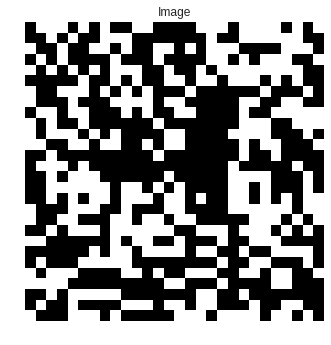

(100, 80)
(80, 60)


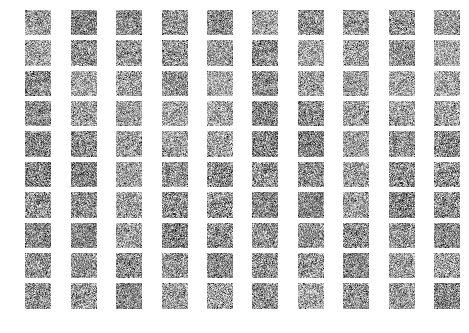

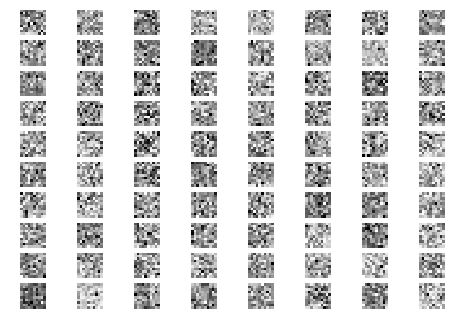

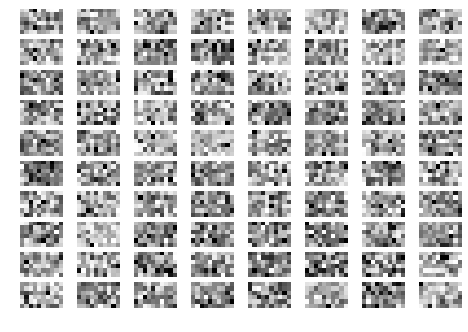

In [10]:

  
def vis2(x):
  a = x.reshape(28,28)
  plt.axis('off')
  plt.imshow(a, interpolation='nearest')
  plt.title('Image')
  plt.show()


vis(sample)
test1 = np.zeros((n_hidden_1,n_visible))
for i in range(n_hidden_1):
  for j in range(n_visible):
    test1[i,j] = w1[j,i]

test2 = np.zeros((n_hidden_2,n_hidden_1))
for i in range(n_hidden_2):
  for j in range(n_hidden_1):
    test2[i,j] = w2[j,i]

    
if(False):
  test3 = np.zeros((n_hidden_2,n_hidden_3))
  for i in range(n_hidden_2):
    for j in range(n_hidden_3):
      #print(str(j) + " in round " + str(i))
      print(w3[j,i])
      #test3[i,j] = w3[j,i]
    
def visBig1(x):
  n = len(x)
  nDiv = n/10
  f, axarr = plt.subplots(10,nDiv)
  for i in range(10):
    for j in range(nDiv):
      a = x[i*5 + j].reshape(28,28)
      axarr[i,j].imshow(a)
      axarr[i,j].axis('off')  

      
def visBig2(x):
  n = len(x)
  nDiv = n/10
  f, axarr = plt.subplots(10,nDiv)
  for i in range(10):
    for j in range(nDiv):
      a = x[i*nDiv + j].reshape(10,10)
      axarr[i,j].imshow(a)
      axarr[i,j].axis('off')    

      
def visBig3(x):
  n = len(x)
  nDiv = n/10
  f, axarr = plt.subplots(10,nDiv)
  for i in range(10):
    for j in range(nDiv):
      a = x[i*nDiv + j].reshape(6,10)
      axarr[i,j].imshow(a)
      axarr[i,j].axis('off')       

print(np.shape(w2))      
print(np.shape(w3))      

visBig1(test1) # 100, 784
visBig2(test2) # 80,100
visBig3(w3) # 60,80

#vis2(test)

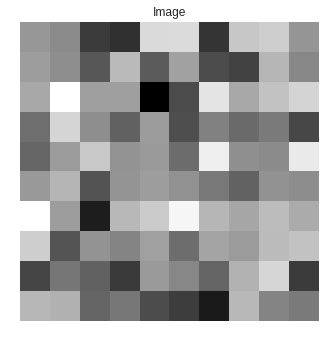

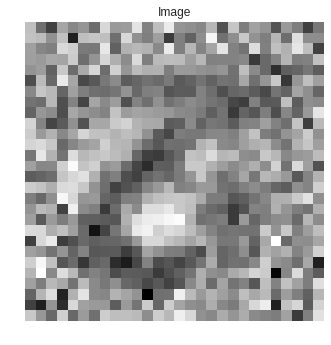

In [114]:

def visTo(x):
  a = x.reshape(10,10)
  plt.axis('off')
  plt.imshow(a, interpolation='nearest')
  plt.title('Image')
  plt.show()

visTo(test2[0])
vis(test1[0])

In [0]:
# STACKED AUTO ENCODER

Start fine tuning
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
epoch 50
epoch 51
epoch 52
epoch 53
epoch 54
epoch 55
epoch 56
epoch 57
epoch 58
epoch 59
epoch 60
epoch 61
epoch 62
epoch 63
epoch 64
epoch 65
epoch 66
epoch 67
epoch 68
epoch 69
epoch 70
epoch 71
epoch 72
epoch 73
epoch 74
epoch 75
epoch 76
epoch 77
epoch 78
epoch 79
RECONSTRUCT


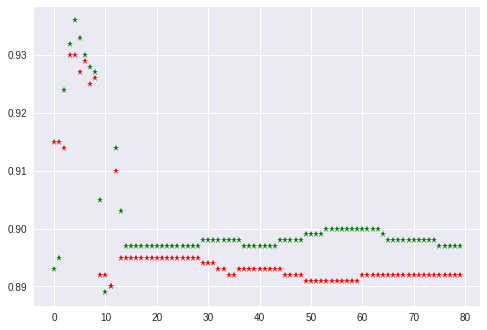

In [29]:


n_input = 784  #Image
n_hidden  = 100 #Hidden layer
lr         = tf.constant(0.005, tf.float32) #The learning rate of our model
epochs = 80 #10000
batch  = 1000 
display_step = 1000

x = tf.placeholder("float",[None,n_input])
y = tf.placeholder("float",[None,10])
yreal = tf.placeholder("float",[None,10])

dec = tf.placeholder("float",[1,n_input])
dec_2 = tf.placeholder("float",[1,n_input])


threeLayers = False
twoLayers = False
oneLayer = False


weights = {
     # layer 1
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden, n_input])),
     # layer 2
    'encoder_h2': tf.Variable(tf.random_normal([n_input, n_hidden])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden, n_input])),
    # layer 3
    'encoder_h3': tf.Variable(tf.random_normal([n_input, n_hidden])),
    'decoder_h3': tf.Variable(tf.random_normal([n_hidden, n_input])),
    # Output Layer
    'output_layer_w': tf.Variable(tf.random_normal([n_input,10]))
    
}
biases = {
    # layer 1
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    # layer 2
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
    # layer 3
    'encoder_b3': tf.Variable(tf.random_normal([n_hidden])),
    'decoder_b3': tf.Variable(tf.random_normal([n_input])),
    # Output layer
    'output_layer_b': tf.Variable(tf.random_normal([10]))
}
    
def encoder(x,w,b):
    #Hidden layer sigmoid
    hid1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights[w]), biases[b]))
    return hid1
  
def decoder(x,w,b):
    hid1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights[w]), biases[b]))
    return hid1

def output(x,w,b):
  out = tf.nn.sigmoid(tf.add(tf.matmul(x,weights[w]),biases[b]))
  return out
    
#Model PRETRAIN
encoder_op_1 = encoder(x, 'encoder_h1', 'encoder_b1')
decoder_op_1 = decoder(encoder_op_1, 'decoder_h1', 'decoder_b1')    

encoder_op_2 = encoder(dec, 'encoder_h2', 'encoder_b2')
decoder_op_2 = decoder(encoder_op_2, 'decoder_h2', 'decoder_b2')   

encoder_op_3 = encoder(dec_2, 'encoder_h3', 'encoder_b3')
decoder_op_3 = decoder(encoder_op_3, 'decoder_h3', 'decoder_b3')   



#Model FINETUNE
encoder_op_1_fine = encoder(x, 'encoder_h1', 'encoder_b1')
decoder_op_1_fine = decoder(encoder_op_1_fine, 'decoder_h1', 'decoder_b1')    

encoder_op_2_fine = encoder(decoder_op_1_fine, 'encoder_h2', 'encoder_b2')
decoder_op_2_fine = decoder(encoder_op_2_fine, 'decoder_h2', 'decoder_b2')   

encoder_op_3_fine = encoder(decoder_op_2_fine, 'encoder_h3', 'encoder_b3')
decoder_op_3_fine = decoder(encoder_op_3_fine, 'decoder_h3', 'decoder_b3')  
if(threeLayers):
   label        = output(decoder_op_3_fine, 'output_layer_w', 'output_layer_b')
elif(twoLayers and not threeLayers):
   label = output(decoder_op_2_fine,'output_layer_w', 'output_layer_b')
elif(oneLayer and not threeLayers and not twoLayers):
   label = output(decoder_op_1_fine,'output_layer_w', 'output_layer_b')
else:
   label = output(decoder_op_3_fine,'output_layer_w', 'output_layer_b')
#Prediction
y_pred1 = decoder_op_1 # change to 1, 2 or 3
y_true1 = x

y_pred2 = decoder_op_2 # change to 1, 2 or 3
y_true2 = dec

y_pred3 = decoder_op_3 
y_true3 = dec_2

y_pred_final = label
y_real = y

# dataArr_tartrn

y_pred_out = label

# dataArr_tartrn labels


loss1 = tf.reduce_mean(tf.pow(y_true1-y_pred1,2))          #1  
loss2 = tf.reduce_mean(tf.pow(y_true2-y_pred2,2))          #2
loss3 = tf.reduce_mean(tf.pow(y_true3-y_pred3,2))          #2


optimizer1 = tf.train.RMSPropOptimizer(lr).minimize(loss1) #1
optimizer2 = tf.train.RMSPropOptimizer(lr).minimize(loss2) #2
optimizer3 = tf.train.RMSPropOptimizer(lr).minimize(loss3) #2


loss_all = tf.reduce_mean(tf.pow(y_real-y_pred_final,2))   
optimizer_all = tf.train.RMSPropOptimizer(lr).minimize(loss_all)

loss_test = tf.reduce_mean(tf.pow(yreal-y,2))

init = tf.global_variables_initializer()

decod_1 = np.zeros((batch,n_input))
decod_2 = np.zeros((batch,n_input))

error = np.zeros(epochs)
error_local = np.zeros(batch)
test_error = np.zeros(epochs)
test_error_local = np.zeros(batch)

with tf.Session() as sess:
    sess.run(init)
    if(True):
      #Pretrain 1
      if(oneLayer):
        for i in range(epochs):
          print("epoch " + str(i))
          for j in range(batch):
            x_train = np.transpose(np.array(dataArr_bintrn[j,:][0]))
            x_train = [x_train]

            _,l,decod = sess.run([optimizer1,loss1,decoder_op_1], feed_dict ={x: x_train})
            if i == epochs-1:
              decod_1[j,:] = decod
        # After training first layer find decoded representations to input into second layer
        print("finish pretraining 1")

      #Pretrain 2
      if(twoLayers):
        for i in range(epochs):
          print("epoch " + str(i))
          for j in range(batch):
            x_train = np.transpose(np.array(decod_1[j,:]))

            x_train = [x_train]


            _,l,decod_from1 = sess.run([optimizer2,loss2,decoder_op_2], feed_dict ={dec: x_train})
            if i == epochs-1:
              decod_2[j,:] = decod_from1

        print("finish pretraining 2")
      
      #Pretrain 3
      if(threeLayers):
        for i in range(epochs):
          print("epoch " + str(i))
          for j in range(batch):
            x_train = np.transpose(np.array(decod_2[j,:]))
            x_train = [x_train]
            _,l = sess.run([optimizer3,loss3], feed_dict ={dec_2: x_train})
        print("finish pretraining 3")

      
    wPrint_1_nosuper = sess.run(weights['decoder_h1'])
    wPrint_2_nosuper = sess.run(weights['decoder_h2'])
    wPrint_3_nosuper = sess.run(weights['decoder_h3'])
    
    # Train all SUPERVISED LEARNING
    print("Start fine tuning")
    for i in range(epochs):
      print("epoch " + str(i))
      correctClasstrain = 0

      for j in range(batch):
        x_train = np.transpose(np.array(dataArr_bintrn[j,:][0]))
      
        x_train = [x_train]
        
        target = targets[:,j]
        target = [target]
        
        
        _,l,output = sess.run([optimizer_all,loss_all,label], feed_dict ={x: x_train, y: target})
        error_local[j] = l
        winnertrain = np.argmax(output)
        
        correctClasstrain += target[0][winnertrain]
      # Test error rates
      correctClass = 0
      for j in range(batch):
        x_test = np.transpose(np.array(dataArr_bintst[j,:][0]))
      
        x_test = [x_test]
        
        target_tst = targets_tst[:,j]
        target_tst = [target_tst]
        
        output = sess.run(label, feed_dict={x: x_test})
        winner = np.argmax(output)
        correctClass += target_tst[0][winner]
      test_error[i] = 1-correctClass/batch  
      error[i] = 1-correctClasstrain/batch
      
    #Done with training
    #Plot error
    plt.figure(1)
    plt.plot(error,'g*')
                            
    plt.plot(test_error,'r*')
    
                            
    #Reconstruct picture
    # View weights
    wPrint_1 = sess.run(weights['decoder_h1'])
    wPrint_2 = sess.run(weights['decoder_h2'])
    wPrint_3 = sess.run(weights['decoder_h3'])

    print("RECONSTRUCT")
    

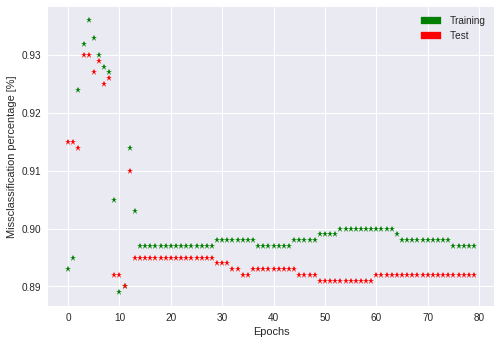

In [30]:
import matplotlib.patches as mpatches
plt.figure(1)
plt.plot(error,'g*')
plt.plot(test_error,'r*')

plt.xlabel('Epochs')
plt.ylabel('Missclassification percentage [%]')

green = mpatches.Patch(color='green', label='Training')
red = mpatches.Patch(color='red', label='Test')
plt.legend(handles=[green,red])

No super tuning
Weights 1
Super tuning
Weights 1


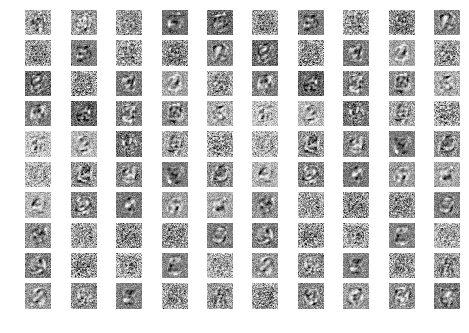

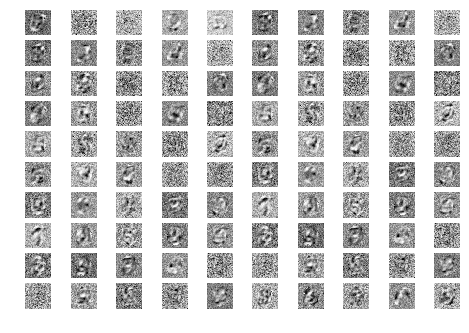

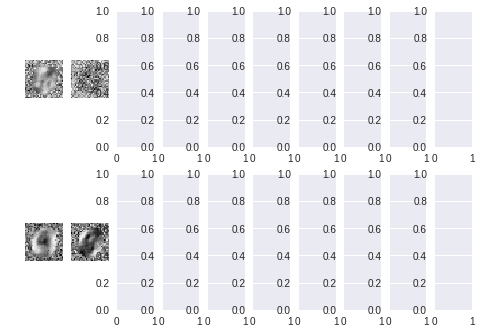

In [159]:
def visBig(x):
  n = len(x)
  nDiv = n/10
  f, axarr = plt.subplots(nDiv,10)
  
  #f.axis('off')
  #plt.axis('off')
  for i in range(nDiv):
    for j in range(nDiv):
      a = x[i*5 + j].reshape(28,28)
      axarr[i,j].imshow(a)
      axarr[i,j].axis('off')

      
print("No super tuning")      
print("Weights 1")
visBig(wPrint_1_nosuper )
#print("Weights 2")
visBig(wPrint_2_nosuper )
#print("Weights 3")
visBig(wPrint_3_nosuper ) 

print("Super tuning")  
print("Weights 1")
#visBig(wPrint_1)
      


Super tuning
Weights 1
Weights 2
Weights 3


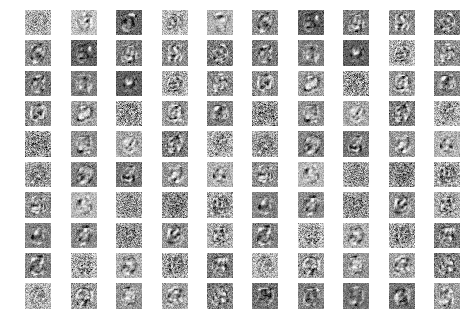

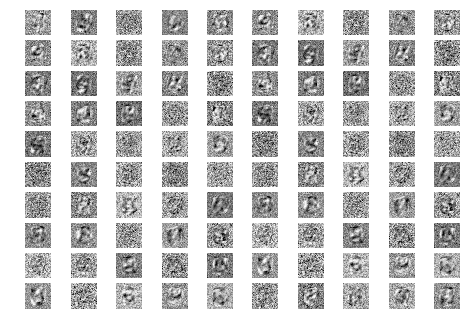

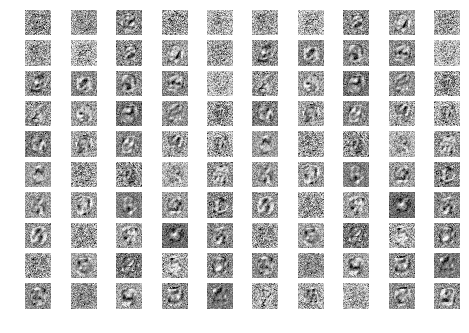

In [161]:
print("Super tuning")  
print("Weights 1")
visBig(wPrint_1)
print("Weights 2")
visBig(wPrint_2)
print("Weights 3")
visBig(wPrint_3)

In [66]:
print(dataArr_tartrn[0])

[6]


In [113]:


print(error_local[0])

[0.]
